# The group task

- Loading packages

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat
import math
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# To display the graphs here
%matplotlib inline


- Importing the data

In [2]:
health = pd.read_sas("/Users/nathankhadaroo/Desktop/task/Group/london ward data health.sas7bdat", format='sas7bdat', encoding='latin1')
environment = pd.read_csv("/Users/nathankhadaroo/Desktop/task/Group/London ward data environment.csv")
district_codes = pd.read_csv("/Users/nathankhadaroo/Desktop/task/Group/LondonDistrictcodes.csv")
demo = pd.read_table("/Users/nathankhadaroo/Desktop/task/Group/London ward data demographics.dat")
socio  = pd.read_csv("/Users/nathankhadaroo/Desktop/task/Group/lsd.csv")
lol = pd.read_csv("/Users/nathankhadaroo/Desktop/task/Group/lol_rn1.csv")

In [3]:
wards = lol[["Wardname", "Wardname_rn"]]
wards.head()

,Wardname,Wardname_rn
0,Bromley - Darwin,Darwin
1,Hillingdon - Harefield,Harefield
2,Westminster - Tachbrook,Tachbrook
3,Merton - Village,Village
4,Merton - Hillside,Hillside


In [4]:
district_codes.head()

,District,Districtcode
0,Barking and Dagenham,00AB
1,Barnet,00AC
2,Bexley,00AD
3,Brent,00AE
4,Bromley,00AF


In [5]:
demo.head()

,Wardname,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking
0,Hackney - Queensbridge,17.542063,8.2,44.7,38.3,11.8
1,Hammersmith & Fulham - S&s End,17.915361,8.4,30.6,39.0,11.8
2,Barking & Dagenham - River,26.851598,10.1,38.4,30.9,9.6
3,Tower Hamlets - Bethnal Green North,18.555872,7.0,49.4,38.7,15.0
4,Merton - Abbey,15.731861,8.5,26.6,38.3,12.5


In [6]:
environment.head()

,Wardcode,Population2011Census,Crimerate,Openspace
0,00ANGQ,11201,117.7,0.0
1,00ANGA,11518,114.0,0.3
2,00ADGN,10800,44.2,0.7
3,00BEGH,12321,65.3,0.7
4,00BCFZ,12609,64.3,1.3


In [7]:
socio.head()

,Wardcode,hhSocialRented,JobSeekers,Noqual,Carsperhousehold
0,00ABFX,26.7,8.7,16.4,0.5
1,00ABFY,36.8,10.2,31.2,0.8
2,00ABFZ,29.4,10.2,28.0,0.9
3,00ABGB,20.0,8.8,29.9,1.1
4,00ABGC,37.4,10.2,28.9,0.8


In [8]:
health.head()

,Wardname,Population2011Census,GeneralFertilityRate,Malelifeexpectancy,Femalelifeexpectancy
0,Bromley - Darwin,5110.0,63.8,81.2,82.4
1,Kensington and Chelsea - Royal Hospital,7252.0,52.3,80.5,89.6
2,Hillingdon - Harefield,7399.0,55.8,78.3,82.3
3,Hammersmith and Fulham - Palace Riverside,7483.0,40.0,80.9,89.0
4,Kensington and Chelsea - Pembridge,7659.0,40.4,82.1,85.7


In [9]:
health.loc[health["Malelifeexpectancy"] > 100, ["Wardname", "Malelifeexpectancy"]].head()

,Wardname,Malelifeexpectancy
68,Sutton - Wallington South,178.0


In [10]:
#health = health.drop(68, axis = 0)
#health["Malelifeexpectancy"].mean()
health.at[68,'Malelifeexpectancy']= 78.54
health.head(n=70)

,Wardname,Population2011Census,GeneralFertilityRate,Malelifeexpectancy,Femalelifeexpectancy
0,Bromley - Darwin,5110.0,63.8,81.20,82.4
1,Kensington and Chelsea - Royal Hospital,7252.0,52.3,80.50,89.6
2,Hillingdon - Harefield,7399.0,55.8,78.30,82.3
3,Hammersmith and Fulham - Palace Riverside,7483.0,40.0,80.90,89.0
4,Kensington and Chelsea - Pembridge,7659.0,40.4,82.10,85.7
5,Kensington and Chelsea - Cremorne,7964.0,51.8,83.20,89.7
6,Westminster - Tachbrook,8158.0,33.3,82.20,83.1
7,Kensington and Chelsea - Campden,8178.0,51.5,82.20,85.0
8,Kensington and Chelsea - Stanley,8187.0,48.2,81.20,82.8
9,Kensington and Chelsea - Colville,8377.0,53.3,78.00,88.4


In [11]:
merge1 = pd.merge(health, demo)
merge1['Population2011Census'] = merge1['Population2011Census'].astype(int)
merge1.head()

,Wardname,Population2011Census,GeneralFertilityRate,Malelifeexpectancy,Femalelifeexpectancy,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking
0,Bromley - Darwin,5110,63.8,81.2,82.4,18.317025,21.9,4.8,6.1,0.4
1,Hillingdon - Harefield,7399,55.8,78.3,82.3,19.245844,17.0,12.5,13.3,3.1
2,Westminster - Tachbrook,8158,33.3,82.2,83.1,10.750184,15.4,21.8,41.1,15.1
3,Merton - Village,8491,49.7,82.6,86.3,19.102579,19.3,17.1,34.0,8.3
4,Merton - Hillside,8977,60.0,81.0,91.7,13.824217,13.7,21.7,41.6,11.3


In [12]:
merge2 = pd.merge(environment, socio)
merge2.head()

,Wardcode,Population2011Census,Crimerate,Openspace,hhSocialRented,JobSeekers,Noqual,Carsperhousehold
0,00ANGQ,11201,117.7,0.0,23.7,3.6,9.4,0.6
1,00ANGA,11518,114.0,0.3,24.9,4.5,9.3,0.5
2,00ADGN,10800,44.2,0.7,1.1,2.9,22.1,1.3
3,00BEGH,12321,65.3,0.7,20.3,4.6,12.3,0.7
4,00BCFZ,12609,64.3,1.3,4.7,4.2,17.2,1.2


In [13]:
merged = pd.merge(merge1, merge2)
merged = pd.merge(merged, wards)

In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 555
Data columns (total 18 columns):
Wardname                556 non-null object
Population2011Census    556 non-null int64
GeneralFertilityRate    556 non-null float64
Malelifeexpectancy      556 non-null float64
Femalelifeexpectancy    556 non-null float64
Children                556 non-null float64
Greaterthan65           556 non-null float64
nonwhite                556 non-null float64
NotBorninUK             556 non-null float64
NotEnglishspeaking      556 non-null float64
Wardcode                556 non-null object
Crimerate               556 non-null float64
Openspace               556 non-null float64
hhSocialRented          556 non-null float64
JobSeekers              556 non-null float64
Noqual                  556 non-null float64
Carsperhousehold        556 non-null float64
Wardname_rn             556 non-null object
dtypes: float64(14), int64(1), object(3)
memory usage: 82.5+ KB


In [15]:
merged.head()

,Wardname,Population2011Census,GeneralFertilityRate,Malelifeexpectancy,Femalelifeexpectancy,Children,Greaterthan65,nonwhite,NotBorninUK,NotEnglishspeaking,Wardcode,Crimerate,Openspace,hhSocialRented,JobSeekers,Noqual,Carsperhousehold,Wardname_rn
0,Bromley - Darwin,5110,63.8,81.2,82.4,18.317025,21.9,4.8,6.1,0.4,00AFGQ,58.6,88.8,5.5,1.6,21.9,1.7,Darwin
1,Hillingdon - Harefield,7399,55.8,78.3,82.3,19.245844,17.0,12.5,13.3,3.1,00ASGN,67.4,85.5,24.0,3.2,23.8,1.4,Harefield
2,Westminster - Tachbrook,8158,33.3,82.2,83.1,10.750184,15.4,21.8,41.1,15.1,00BKGR,51.1,32.4,29.3,2.7,12.5,0.4,Tachbrook
3,Merton - Village,8491,49.7,82.6,86.3,19.102579,19.3,17.1,34.0,8.3,00BAGQ,60.3,62.2,5.6,0.9,6.8,1.4,Village
4,Merton - Hillside,8977,60.0,81.0,91.7,13.824217,13.7,21.7,41.6,11.3,00BAGE,52.0,5.7,9.9,1.2,6.4,0.8,Hillside


In [16]:
merged.to_csv("/Users/nathankhadaroo/Desktop/task/Group/merged.csv")

# Preparing the machine learning model

- We will prepare two models for both male and female life expectancy. First the menz.

#### Male model

In [17]:
X = merged[["Femalelifeexpectancy","Greaterthan65", "Noqual", "Crimerate", "JobSeekers", "Openspace"]]
X.head()

,Femalelifeexpectancy,Greaterthan65,Noqual,Crimerate,JobSeekers,Openspace
0,82.4,21.9,21.9,58.6,1.6,88.8
1,82.3,17.0,23.8,67.4,3.2,85.5
2,83.1,15.4,12.5,51.1,2.7,32.4
3,86.3,19.3,6.8,60.3,0.9,62.2
4,91.7,13.7,6.4,52.0,1.2,5.7


In [18]:
rf_raw = RandomForestRegressor(n_estimators=150, max_features=3)
rf_raw.fit(X, merged["Malelifeexpectancy"])
Male_pred = rf_raw.predict(X)

- Adding results to dataset 

In [19]:
df = pd.DataFrame(data=Male_pred, columns=["Male_pred"])
mergednew = pd.concat([merged, df], axis=1)
#mergednew

- Optimising parameters and calculating mse

In [20]:
param_grid = {"n_estimators": [5, 25, 50, 75, 100, 150],"max_features": [1, 2, 3, 4, 5, None]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
grid.fit(X, merged["Malelifeexpectancy"])

/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [5, 25, 50, 75, 100, 150], 'max_features': [1, 2, 3, 4, 5, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [21]:
grid_res = pd.DataFrame(grid.cv_results_)
grid_res[grid_res["mean_test_score"] == grid_res["mean_test_score"].max()]["params"]

/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Use

23    {'max_features': 4, 'n_estimators': 150}
Name: params, dtype: object

In [22]:
math.sqrt(-1*(grid_res[grid_res["mean_test_score"] == grid_res["mean_test_score"].max()]["mean_test_score"]))

2.269045137195003

#### Female model

In [23]:
X = merged[["Malelifeexpectancy","Greaterthan65", "Noqual", "Crimerate", "JobSeekers", "Openspace"]]
rf_raw = RandomForestRegressor(n_estimators=150, max_features=3)
rf_raw.fit(X, merged["Femalelifeexpectancy"])
Female_pred = rf_raw.predict(X)

- Adding to dataframe

In [24]:
df = pd.DataFrame(data=Female_pred, columns=["Female_pred"])
mergednew = pd.concat([mergednew, df], axis=1)
#mergednew

- Optimising parameters and calculating mse

In [25]:
grid.fit(X, merged["Femalelifeexpectancy"])
grid_res = pd.DataFrame(grid.cv_results_)
grid_res[grid_res["mean_test_score"] == grid_res["mean_test_score"].max()]["params"]

/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nathankhadaroo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nathankhad

11    {'max_features': 2, 'n_estimators': 150}
Name: params, dtype: object

In [26]:
math.sqrt(-1*(grid_res[grid_res["mean_test_score"] == grid_res["mean_test_score"].max()]["mean_test_score"]))

2.880272190624756

In [27]:
mergednew = mergednew.rename(columns={"Wardname_rn": "Ward", "Wardname": "Bourough"})
mergednew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 555
Data columns (total 20 columns):
Bourough                556 non-null object
Population2011Census    556 non-null int64
GeneralFertilityRate    556 non-null float64
Malelifeexpectancy      556 non-null float64
Femalelifeexpectancy    556 non-null float64
Children                556 non-null float64
Greaterthan65           556 non-null float64
nonwhite                556 non-null float64
NotBorninUK             556 non-null float64
NotEnglishspeaking      556 non-null float64
Wardcode                556 non-null object
Crimerate               556 non-null float64
Openspace               556 non-null float64
hhSocialRented          556 non-null float64
JobSeekers              556 non-null float64
Noqual                  556 non-null float64
Carsperhousehold        556 non-null float64
Ward                    556 non-null object
Male_pred               556 non-null float64
Female_pred             556 non-null float64


# Visualising results 

In [28]:
nr = mergednew.groupby(["Ward", "Bourough"])\
       [["Malelifeexpectancy", "Male_pred", "Femalelifeexpectancy", "Female_pred"]]\
       .mean()

In [29]:
nr.head(n=100)

Malelifeexpectancy  \
Ward                Bourough                                                       
Abbey               Merton - Abbey                                          80.0   
Abbey Road          Westminster - Abbey Road                                81.5   
Abbey Wood          Greenwich - Abbey Wood                                  74.3   
Acton Central       Ealing - Acton Central                                  81.3   
Addiscombe          Croydon - Addiscombe                                    76.8   
Aldborough          Redbridge - Aldborough                                  77.4   
Alexandra           Haringey - Alexandra                                    79.2   
                    Kingston upon Thames - Alexandra                        80.8   
Alperton            Brent - Alperton                                        76.7   
Ashburton           Croydon - Ashburton                                     78.5   
Balham              Wandsworth - Balham                                     79.3   
Barkingside         Redbridge - Barkingside                                 81.0   
Barnehurst          Bexley - Barnehurst                                     78.6   
Barnes              Richmond upon Thames - Barnes                           82.3   
Barnhill            Brent - Barnhill                                        79.6   
                    Hillingdon - Barnhill                                   75.6   
Barnsbury           Islington - Barnsbury                                   75.0   
Bayswater           Westminster - Bayswater                                 91.6   
Beckton             Newham - Beckton                                        81.9   
Beddington North    Sutton - Beddington North                               79.3   
Beddington South    Sutton - Beddington South                               76.9   
Bedfont             Hounslow - Bedfont                                      77.3   
Bedford             Wandsworth - Bedford                                    78.2   
Bellingham          Lewisham - Bellingham                                   75.2   
Belmont             Harrow - Belmont                                        82.1   
                    Sutton - Belmont                                        78.6   
Belsize             Camden - Belsize                                        82.3   
Belvedere           Bexley - Belvedere                                      77.9   
Bensham Manor       Croydon - Bensham Manor                                 80.9   
Berrylands          Kingston upon Thames - Berrylands                       78.4   
...                                                                          ...   
Canonbury           Islington - Canonbury                                   74.7   
Canons              Harrow - Canons                                         81.1   
Cantelowes          Camden - Cantelowes                                     77.2   
Carshalton Central  Sutton - Carshalton Central                             82.9   
Catford South       Lewisham - Catford South                                77.4   
Cathall             Waltham Forest - Cathall                                74.9   
Cathedrals          Southwark - Cathedrals                                  75.0   
Cavendish           Hillingdon - Cavendish                                  80.6   
Cazenove            Hackney - Cazenove                                      74.4   
Chadwell            Redbridge - Chadwell                                    77.9   
Chapel End          Waltham Forest - Chapel End                             75.8   
Charlton            Greenwich - Charlton                                    74.1   
Charville           Hillingdon - Charville                                  81.6   
Chase               Enfield - Chase                                         76.8   
Chatham             Hackney - Chatham                                       72.5   
Chaucer             Southwark 

In [34]:
sns.set(style="darkgrid")
sns.set_palette("deep")

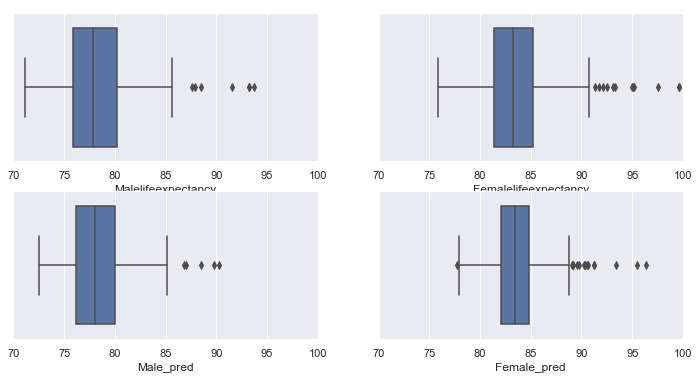

In [35]:
f, axs = plt.subplots(2, 2, figsize=(12, 6))

ax = sns.boxplot(x=mergednew["Malelifeexpectancy"], ax = axs[0,0])

ax.set(xlim=(70, 100))

ax = sns.boxplot(x=mergednew["Male_pred"], ax = axs[1,0])

ax.set(xlim=(70, 100))

ax = sns.boxplot(x=mergednew["Femalelifeexpectancy"], ax = axs[0,1])

ax.set(xlim=(70, 100))

ax = sns.boxplot(x=mergednew["Female_pred"], ax = axs[1,1])

ax.set(xlim=(70, 100))

plt.show()

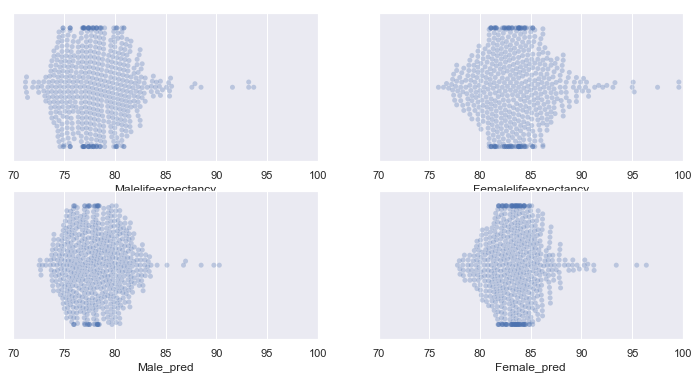

In [36]:
f, axs = plt.subplots(2, 2, figsize=(12, 6))

ax = sns.swarmplot(x=mergednew["Malelifeexpectancy"],
              alpha=0.3, ax = axs[0,0])

ax.set(xlim=(70, 100))

ax = sns.swarmplot(x=mergednew["Male_pred"],
              alpha=0.3, ax = axs[1,0])

ax.set(xlim=(70, 100))

ax = sns.swarmplot(x=mergednew["Femalelifeexpectancy"],
              alpha=0.3, ax = axs[0,1])

ax.set(xlim=(70, 100))

ax = sns.swarmplot(x=mergednew["Female_pred"],
              alpha=0.3, ax = axs[1,1])

ax.set(xlim=(70, 100))

plt.show()

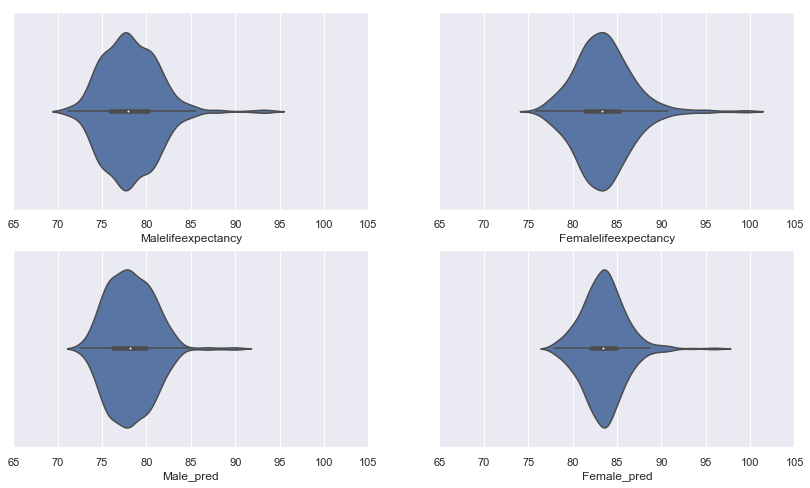

In [41]:
f, axs = plt.subplots(2, 2, figsize=(14, 8))


ax = sns.violinplot(x=mergednew["Malelifeexpectancy"], ax = axs[0,0])

ax.set(xlim=(65, 105))

ax = sns.violinplot(x=mergednew["Male_pred"], ax = axs[1,0])

ax.set(xlim=(65, 105))

ax = sns.violinplot(x=mergednew["Femalelifeexpectancy"], ax = axs[0,1])

ax.set(xlim=(65, 105))

ax = sns.violinplot(x=mergednew["Female_pred"], ax = axs[1,1])

ax.set(xlim=((65, 105)))

plt.show()